In [28]:

# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

In [30]:

study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [31]:
# Combine the data into a single dataset using an outer join
# returns all the rows from the left dataframe, all the rows from the right dataframe, and matches up rows where possible, with NaNs elsewhere
merge_data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')
merge_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [32]:
# Sort merged database by Tumor Volume to allow for median values to be correct
merge_data_sort = merge_data.sort_values(["Tumor Volume (mm3)"], ascending=True)

merge_data_sort.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
7,k403,Ramicane,Male,21,16,35,26.546993,1


In [33]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Identify the diferrent Drug Regimen along with the total tumer volume for each using .groupby
regimen_grouped = merge_data_sort.groupby(["Drug Regimen"])
regimen_grouped

#create a variable to capture the total tumor volume for each regimen
#tumor_volume = regimen_grouped["Tumor Volume (mm3)"].sum()

#create computation for the mean of each regimen
regimen_mean = regimen_grouped["Tumor Volume (mm3)"].mean()

#Create computation for the median of each regimen
regimen_median = regimen_grouped["Tumor Volume (mm3)"].median()

#Create computation for the variance of each regimen
regimen_variance = regimen_grouped["Tumor Volume (mm3)"].var()

#create computation for the standard deviation of each regimen
regimen_std = regimen_grouped["Tumor Volume (mm3)"].std()

#create computation for the SEM
regimen_sem = regimen_grouped["Tumor Volume (mm3)"].sem()

In [34]:
summary_stats = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, "Standard Deviation": regimen_std, "SEM": regimen_sem})

summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [35]:
#Groupby drug regimen with .count and mouse id to determine the datapoints
regimen_data_points = merge_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
regimen_data_points


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

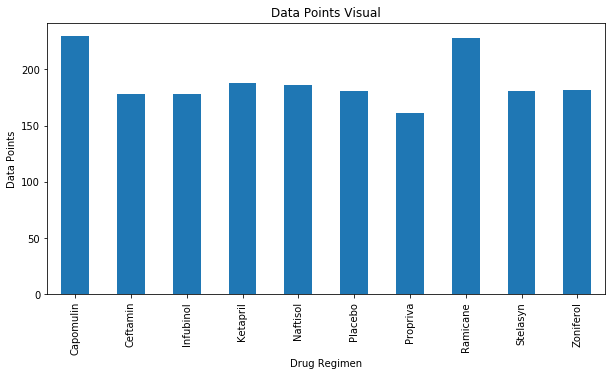

<Figure size 432x288 with 0 Axes>

In [36]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
regimen_data_points.plot(kind="bar", figsize=(10,5))

#set chart title
plt.title("Data Points Visual")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

#show chart and set layout
plt.show()
plt.tight_layout()

Text(0, 0.5, 'Data Points')

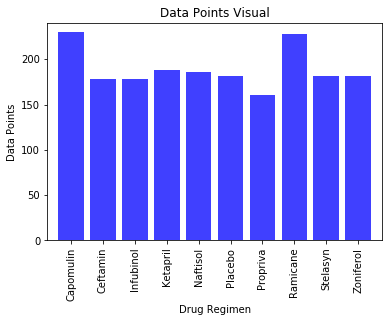

In [37]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

#Create an arraw with the datapoints
users = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

#Set the x_axis to be the amount of the Data Regimen
x_axis = np.arange(len(regimen_data_points))

plt.bar(x_axis, users, color='b', alpha=0.75, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(users)+10)

plt.title("Data Points Visual")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

In [38]:
#Group by "Mouse ID" and "Sex" to find the unique number of male vs female
groupby_gender = merge_data.groupby(["Mouse ID","Sex"])
groupby_gender

mouse_gender_df = pd.DataFrame(groupby_gender.size())

#Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

#create and format the percentage of female vs male
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

#format the "Percentage of Sex" column
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

#gender_df
mouse_gender

,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


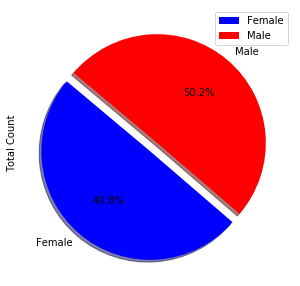

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#plot = name of the data frame .plot.pie (sumplots true)
colors = ['blue', 'red']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(5,5), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

(-1.1879383453817902,
 1.111754351424799,
 -1.1987553745848882,
 1.1126035084692154)

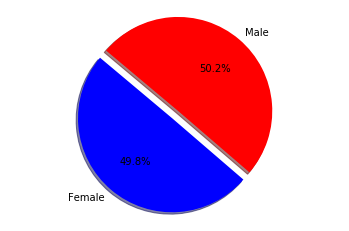

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create Labels for the sections of the pie
labels = ["Female","Male"]

#List the values of each section of the pie chart
sizes = [49.799197,50.200803]

#Set colors for each section of the pie
colors = ['blue', 'red']

#Determoine which section of the circle to detach
explode = (0.1, 0)

#Create the pie chart based upon the values 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

#Set equal axis
plt.axis("equal")

In [41]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the IQR and quantitatively determine if there are any potential outliers. 

#Extract the top 4 regimenes from the data frame in order to perform IQR test on each
best_regimes = merge_data[merge_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
best_regimes = best_regimes.sort_values(["Timepoint"], ascending=True)
best_regimes

best_regimes_data = best_regimes[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

best_regimes_data

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


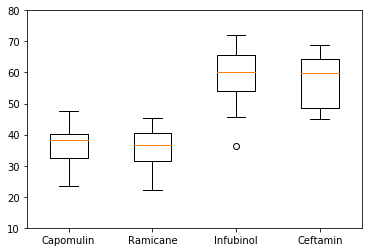

In [42]:
#Group data by Drug Regimen and Mouse ID to capture Last Tumor Measurement
best_regimens_sort = best_regimes_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
best_regimens_sort.head()

# Turn retrieved data into dataframe to easily manipulate
best_regimen_df = best_regimens_sort.to_frame()
best_regimen_df

#Create a list to use as labels and dataframe
top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_df = best_regimen_df.reset_index()
tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(top_4)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=top_4)
plt.ylim(10, 80)
plt.show()

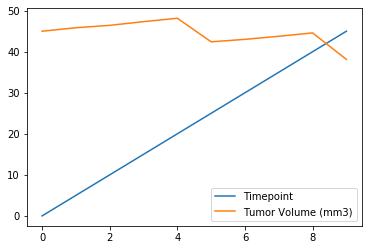

In [50]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
time_vs_tumer = merge_data[merge_data["Mouse ID"].isin(["j119"])]
time_vs_tumer

time_vs_tumer_data = time_vs_tumer[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
time_vs_tumer_data

line_plot_df = time_vs_tumer_data.reset_index()
line_plot_df

line_plot_final = line_plot_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
line_plot_final

lines = line_plot_final.plot.line()

In [51]:
tumorvolume_list = line_plot_final['Tumor Volume (mm3)'].tolist()
timepoint_list = line_plot_final['Timepoint'].tolist()

In [52]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_scatter = merge_data[merge_data["Drug Regimen"].isin(["Capomulin"])]

capomulin_scatter_df = best_regimes[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]

capomulin_sorted = capomulin_scatter_plot.sort_values(["Weight (g)"], ascending=True)

capomulin_scatter_plot = capomulin_scatter.reset_index()

capomulin_grouped_weight = capomulin_scatter_plot.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

capo_grouped_plot = pd.DataFrame(capomulin_grouped_weight).reset_index()


#capomulin_scatter = capomulin_grouped_weight.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)')
#
capomulin_scatter = capo_grouped_plot.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize= (8,8))
#capomulin_scatter

NameError: name 'capomulin_scatter_plot' is not defined